# Problem Statement

## Context

In the realm of modern finance, businesses encounter the perpetual challenge of managing debt obligations effectively to maintain a favorable credit standing and foster sustainable growth. Investors keenly scrutinize companies capable of navigating financial complexities while ensuring stability and profitability. A pivotal instrument in this evaluation process is the balance sheet, which provides a comprehensive overview of a company's assets, liabilities, and shareholder equity, offering insights into its financial health and operational efficiency. In this context, leveraging available financial data, particularly from preceding fiscal periods, becomes imperative for informed decision-making and strategic planning.

## Objective

A group of venture capitalists want to develop a Financial Health Assessment Tool. With the help of the tool, it endeavors to empower businesses and investors with a robust mechanism for evaluating the financial well-being and creditworthiness of companies. By harnessing machine learning techniques, they aim to analyze historical financial statements and extract pertinent insights to facilitate informed decision-making via the tool. Specifically, they foresee facilitating the following with the help of the tool:

1. Debt Management Analysis: Identify patterns and trends in debt management practices to assess the ability of businesses to fulfill financial obligations promptly and efficiently, and identify potential cases of default.
2. Credit Risk Evaluation: Evaluate credit risk exposure by analyzing liquidity ratios, debt-to-equity ratios, and other key financial indicators to ascertain the likelihood of default and inform investment decisions.

They have hired you as a data scientist and provided you with the financial metrics of different companies. The task is to analyze the data provided and develop a predictive model leveraging machine learning techniques to identify whether a given company will be tagged as a defaulter in terms of net worth next year. The predictive model will help the organization anticipate potential challenges with the financial performance of the companies and enable proactive risk mitigation strategies.


## Data Dictionary

The data consists of financial metrics from the balance sheets of different companies. The detailed data dictionary is given below.

1. Networth Next Year: Net worth of the customer in the next year
2. Total assets: Total assets of customer
3. Net worth: Net worth of the customer of the present year
4. Total income: Total income of the customer
5. Change in stock: Difference between the current value of the stock and the value of stock in the last trading day
6. Total expenses: Total expenses done by the customer
7. Profit after tax: Profit after tax deduction
8. PBDITA: Profit before depreciation, income tax, and amortization
9. PBT: Profit before tax deduction
10. Cash profit: Total Cash profit
11. PBDITA as % of total income: PBDITA / Total income
12. PBT as % of total income: PBT / Total income
13. PAT as % of total income: PAT / Total income
14. Cash profit as % of total income: Cash Profit / Total income
15. PAT as % of net worth: PAT / Net worth
16. Sales: Sales done by the customer
17. Income from financial services: Income from financial services
18. Other income: Income from other sources
19. Total capital: Total capital of the customer
20. Reserves and funds: Total reserves and funds of the customer
21. Borrowings: Total amount borrowed by the customer
22. Current liabilities & provisions: current liabilities of the customer
23. Deferred tax liability: Future income tax customer will pay because of the current transaction
24. Shareholders funds: Amount of equity in a company which belongs to shareholders
25. Cumulative retained profits: Total cumulative profit retained by customer
26. Capital employed: Current asset minus current liabilities
27. TOL/TNW: Total liabilities of the customer divided by Total net worth
28. Total term liabilities / tangible net worth: Short + long term liabilities divided by tangible net worth
29. Contingent liabilities / Net worth (%): Contingent liabilities / Net worth
30. Contingent liabilities: Liabilities because of uncertain events
31. Net fixed assets: The purchase price of all fixed assets
32. Investments: Total invested amount
33. Current assets: Assets that are expected to be converted to cash within a year
34. Net working capital: Difference between the current liabilities and current assets
35. Quick ratio (times): Total cash divided by current liabilities
36. Current ratio (times): Current assets divided by current liabilities
37. Debt to equity ratio (times): Total liabilities divided by its shareholder equity
38. Cash to current liabilities (times): Total liquid cash divided by current liabilities
39. Cash to average cost of sales per day: Total cash divided by the average cost of the sales
40. Creditors turnover: Net credit purchase divided by average trade creditors
41. Debtors turnover: Net credit sales divided by average accounts receivable
42. Finished goods turnover: Annual sales divided by average inventory
43. WIP turnover: The cost of goods sold for a period divided by the average inventory for that period
44. Raw material turnover: Cost of goods sold is divided by the average inventory for the same period
45. Shares outstanding: Number of issued shares minus the number of shares held in the company
46. Equity face value: cost of the equity at the time of issuing
47. EPS: Net income divided by the total number of outstanding share
48. Adjusted EPS: Adjusted net earnings divided by the weighted average number of common shares outstanding on a diluted basis during the plan year
49. Total liabilities: Sum of all types of liabilities
50. PE on BSE: Company's current stock price divided by its earnings per share

# Importing necessary libraries

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as SM
from sklearn import metrics

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }<\style>'))

# Loading the Data

In [21]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [22]:
df = pd.read_csv('/Users/ishashukla/Downloads/Company%28FRA%29.csv')  ##  Fill the blank to read the data
df.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


# Data Overview

In [23]:
df.head(5) ##  Complete the code to view top 5 rows of the data

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [24]:
df.tail() ##  Complete the code to view last 5 rows of the data

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
4251,4252,0.2,0.4,0.2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.4,NaN
4252,4253,93.3,159.6,86.7,172.9,0.1,169.7,3.3,18.4,3.7,...,1.80,11.00,8.28,9.88,8162700.0,10.0,0.42,0.42,159.6,16.81
4253,4254,932.2,833.8,664.6,2314.7,32.1,2151.6,195.2,348.4,303.0,...,6.08,59.28,31.14,9.87,7479762.0,10.0,26.58,26.58,833.8,5.69
4254,4255,64.6,95.0,48.5,110.5,4.6,113.5,1.6,9.7,2.6,...,3.71,78.99,11.51,14.95,NaN,NaN,0.00,0.00,95.0,NaN
4255,4256,0.0,384.6,111.3,345.8,11.3,341.7,15.4,57.6,20.7,...,4.71,53.37,8.33,3.74,960000.0,10.0,15.63,15.63,384.6,NaN


In [25]:
df.shape ##  Complete the code to view dimensions of the data

(4256, 51)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

In [27]:
# Remove '_' (startswith) from column headers where present
for col in df.columns:
    if col.startswith('_'):
        df.rename(columns={col: col[1:]}, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

In [29]:
# checking for duplicate values
df.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

In [30]:
#checking for no. of unique values
df.nunique() ##  Complete the code to check unique entries in the data

Num                                            4256
Networth Next Year                             2574
Total assets                                   2961
Net worth                                      2376
Total income                                   2870
Change in stock                                1164
Total expenses                                 2898
Profit after tax                               1467
PBDITA                                         1826
PBT                                            1568
Cash profit                                    1655
PBDITA as % of total income                    2032
PBT as % of total income                       1878
PAT as % of total income                       1692
Cash profit as % of total income               1867
PAT as % of net worth                          2385
Sales                                          2847
Income from fincial services                    561
Other income                                    406
Total capita

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num,4256.0,2.128500e+03,1.228746e+03,1.000000e+00,1064.750,2128.500,3.192250e+03,4.256000e+03
Networth Next Year,4256.0,1.344741e+03,1.593674e+04,-7.426560e+04,3.975,72.100,3.308250e+02,8.057734e+05
Total assets,4256.0,3.573617e+03,3.007444e+04,1.000000e-01,91.300,315.500,1.120800e+03,1.176509e+06
Net worth,4256.0,1.351950e+03,1.296131e+04,0.000000e+00,31.475,104.800,3.898500e+02,6.131516e+05
Total income,4025.0,4.688190e+03,5.391895e+04,0.000000e+00,107.100,455.100,1.485000e+03,2.442828e+06
Change in stock,3706.0,4.370248e+01,4.369150e+02,-3.029400e+03,-1.800,1.600,1.840000e+01,1.418550e+04
Total expenses,4091.0,4.356301e+03,5.139809e+04,-1.000000e-01,96.800,426.800,1.395700e+03,2.366035e+06
Profit after tax,4102.0,2.950506e+02,3.079902e+03,-3.908300e+03,0.500,9.000,5.330000e+01,1.194391e+05
PBDITA,4102.0,6.059406e+02,5.646231e+03,-4.407000e+02,6.925,36.900,1.587000e+02,2.085765e+05
PBT,4102.0,4.102590e+02,4.217415e+03,-3.894800e+03,0.800,12.600,7.417500e+01,1.452926e+05


* We can see that `Co_Code` and `Co_Name` are not relevant for this exercise
* So we will drop these variables

In [32]:
df.drop(['Num', 'Adjusted EPS'], axis = 1, inplace = True)

# Exploratory Data Analysis

## Univariate Analysis

In [104]:
# Create the 'default_status' column based on the net worth condition
df['Default'] = df['Networth Next Year'].apply(lambda x: 1 if x > 0 else 0)

In [105]:
df["Default"].nunique()   ## Complete the code to check unique values in the mentioned column

2

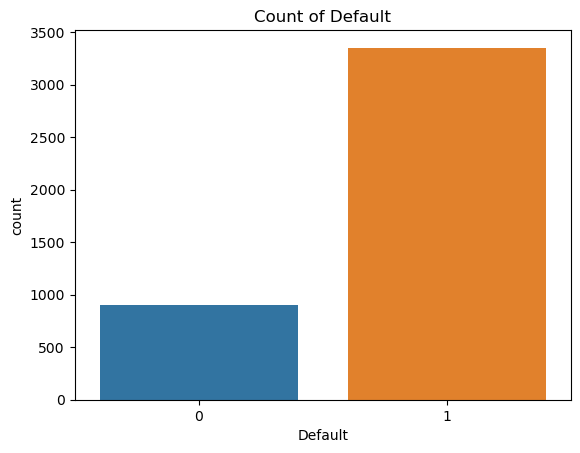

In [106]:
#Plotting a countplot for the target variable
sns.countplot(x = "Default", data = df)   ## Complete the code to get a countplot of the mentionedd column.
plt.title('Count of Default')
plt.show()

In [107]:
#Percentage of defaulters
p=round(((df.Default.sum()/len(df)) * 100),2)
print('Percentage of defaulters',p,'%')

Percentage of defaulters 78.76 %


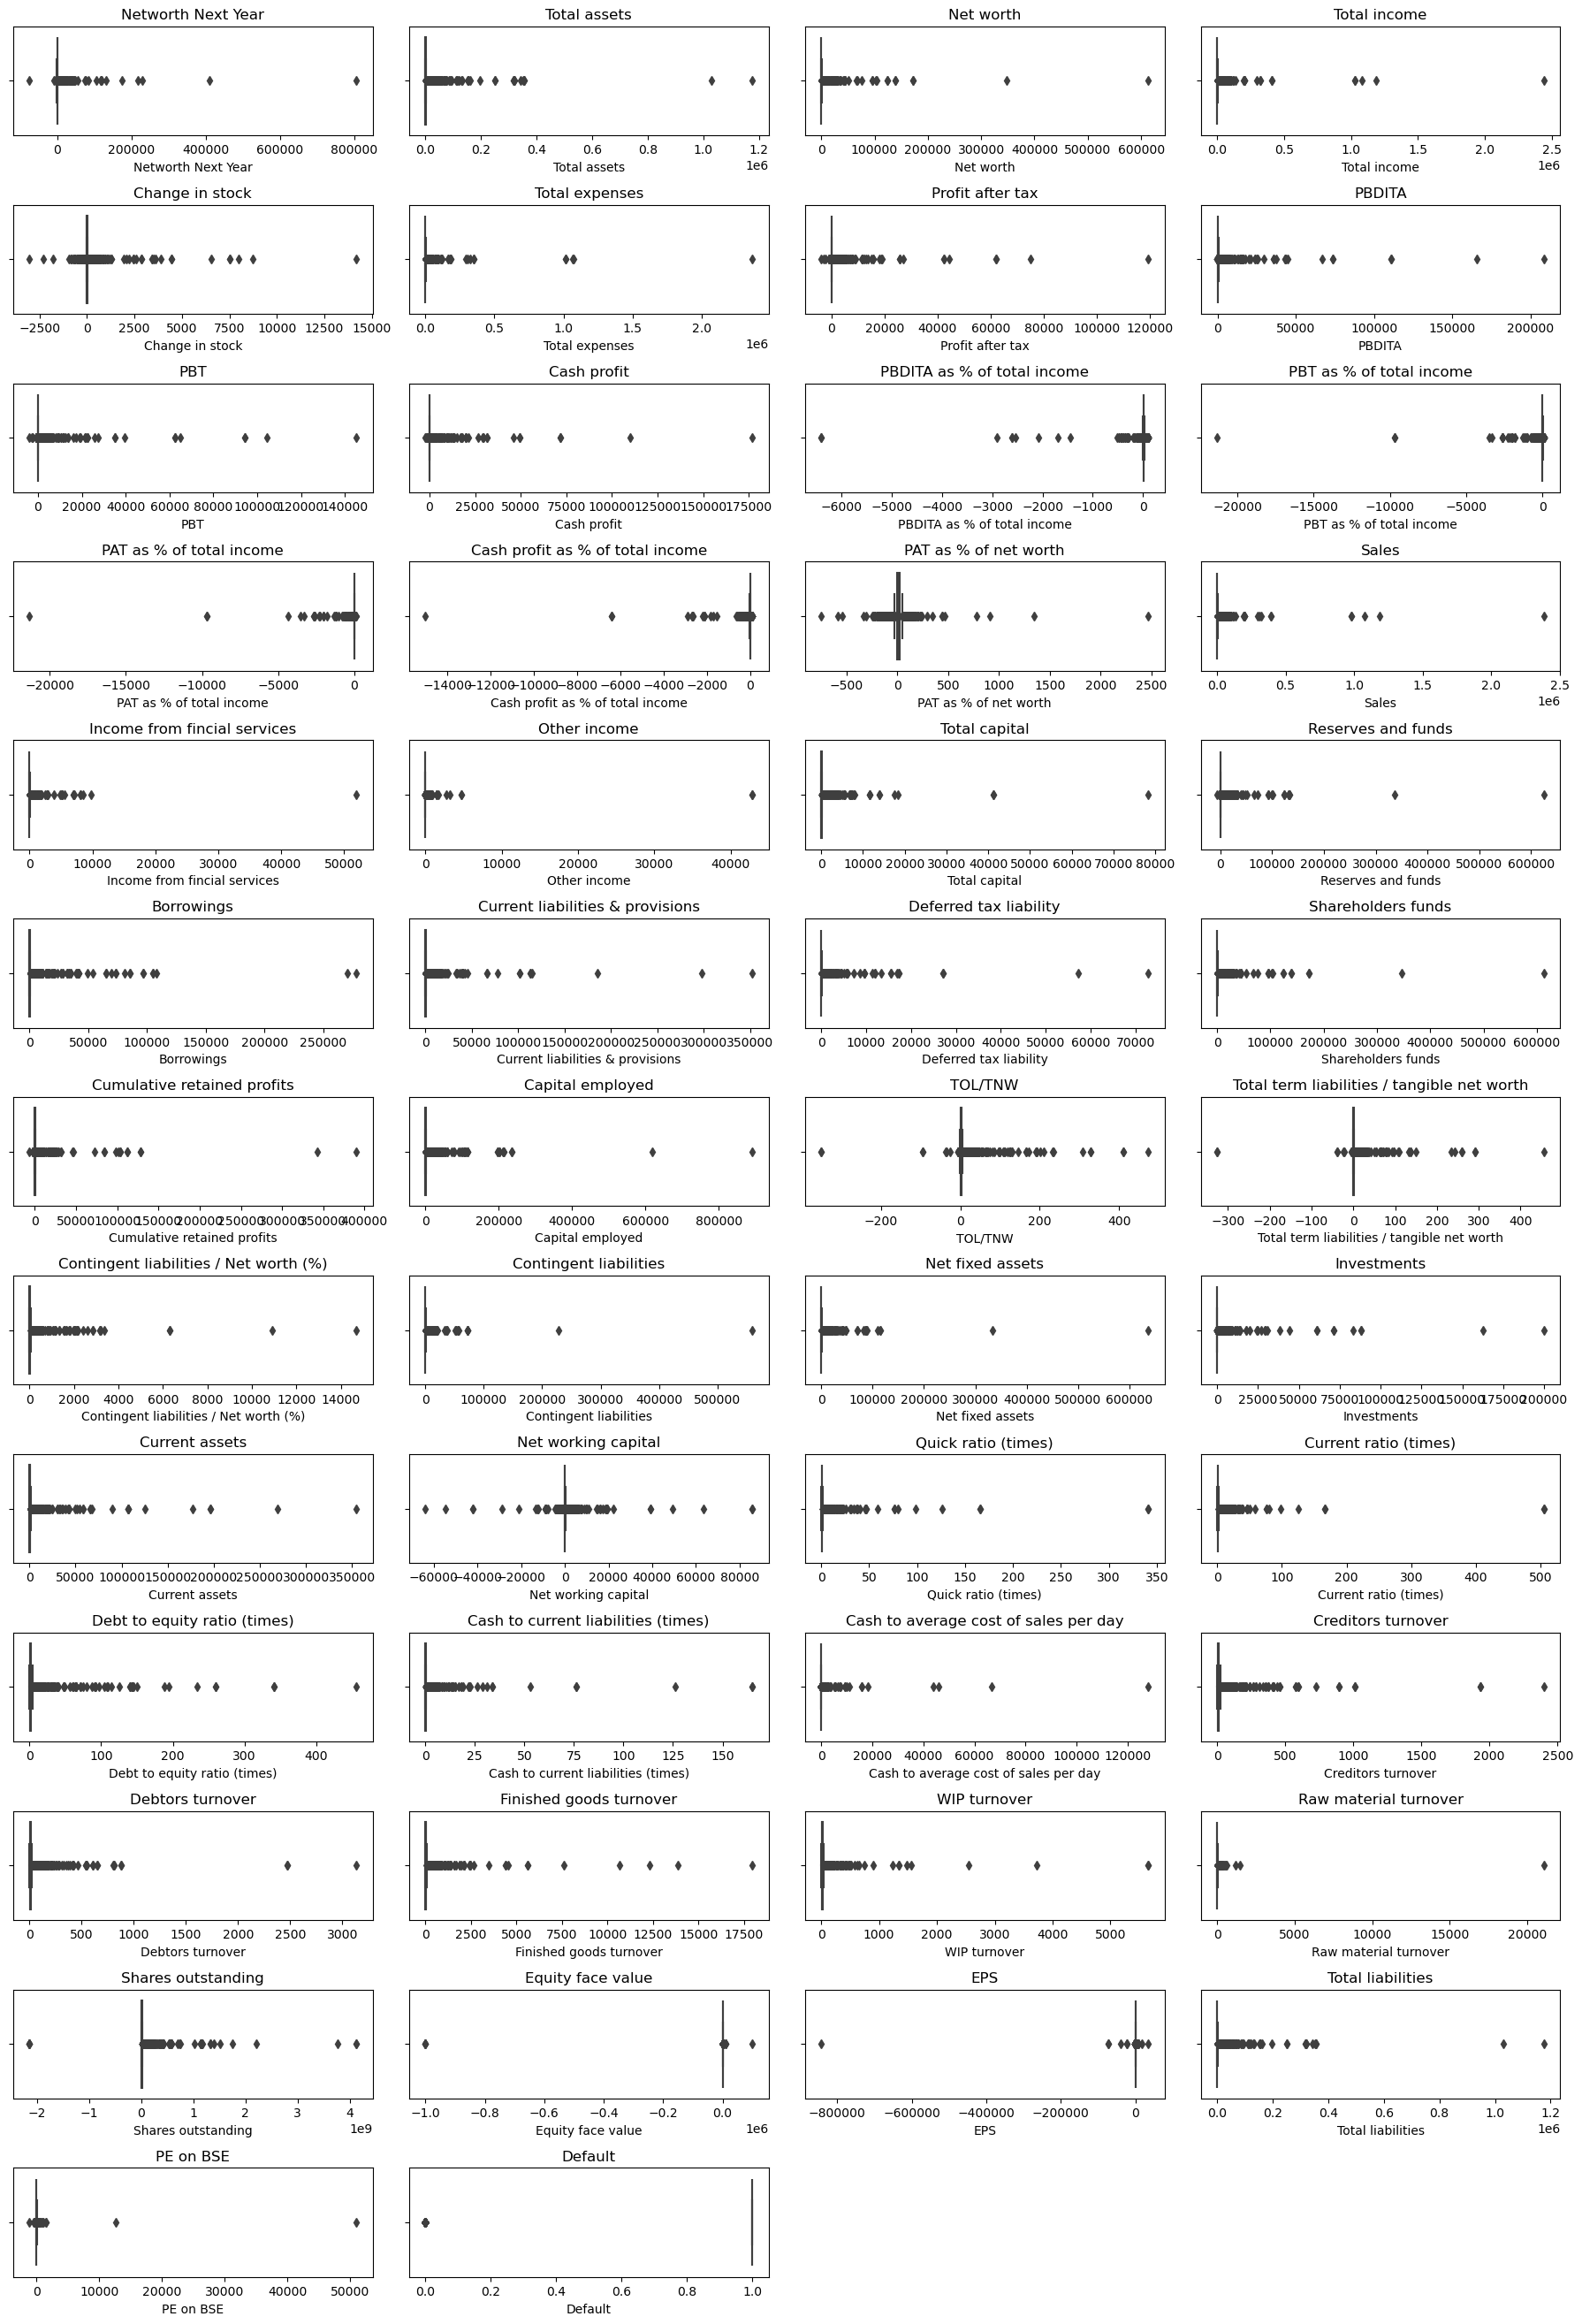

In [37]:
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(data=df, x=variable)  ## Complete the code to get boxplots for all numerical columns
    plt.tight_layout()
    plt.title(variable)


## Bivariate Analysis

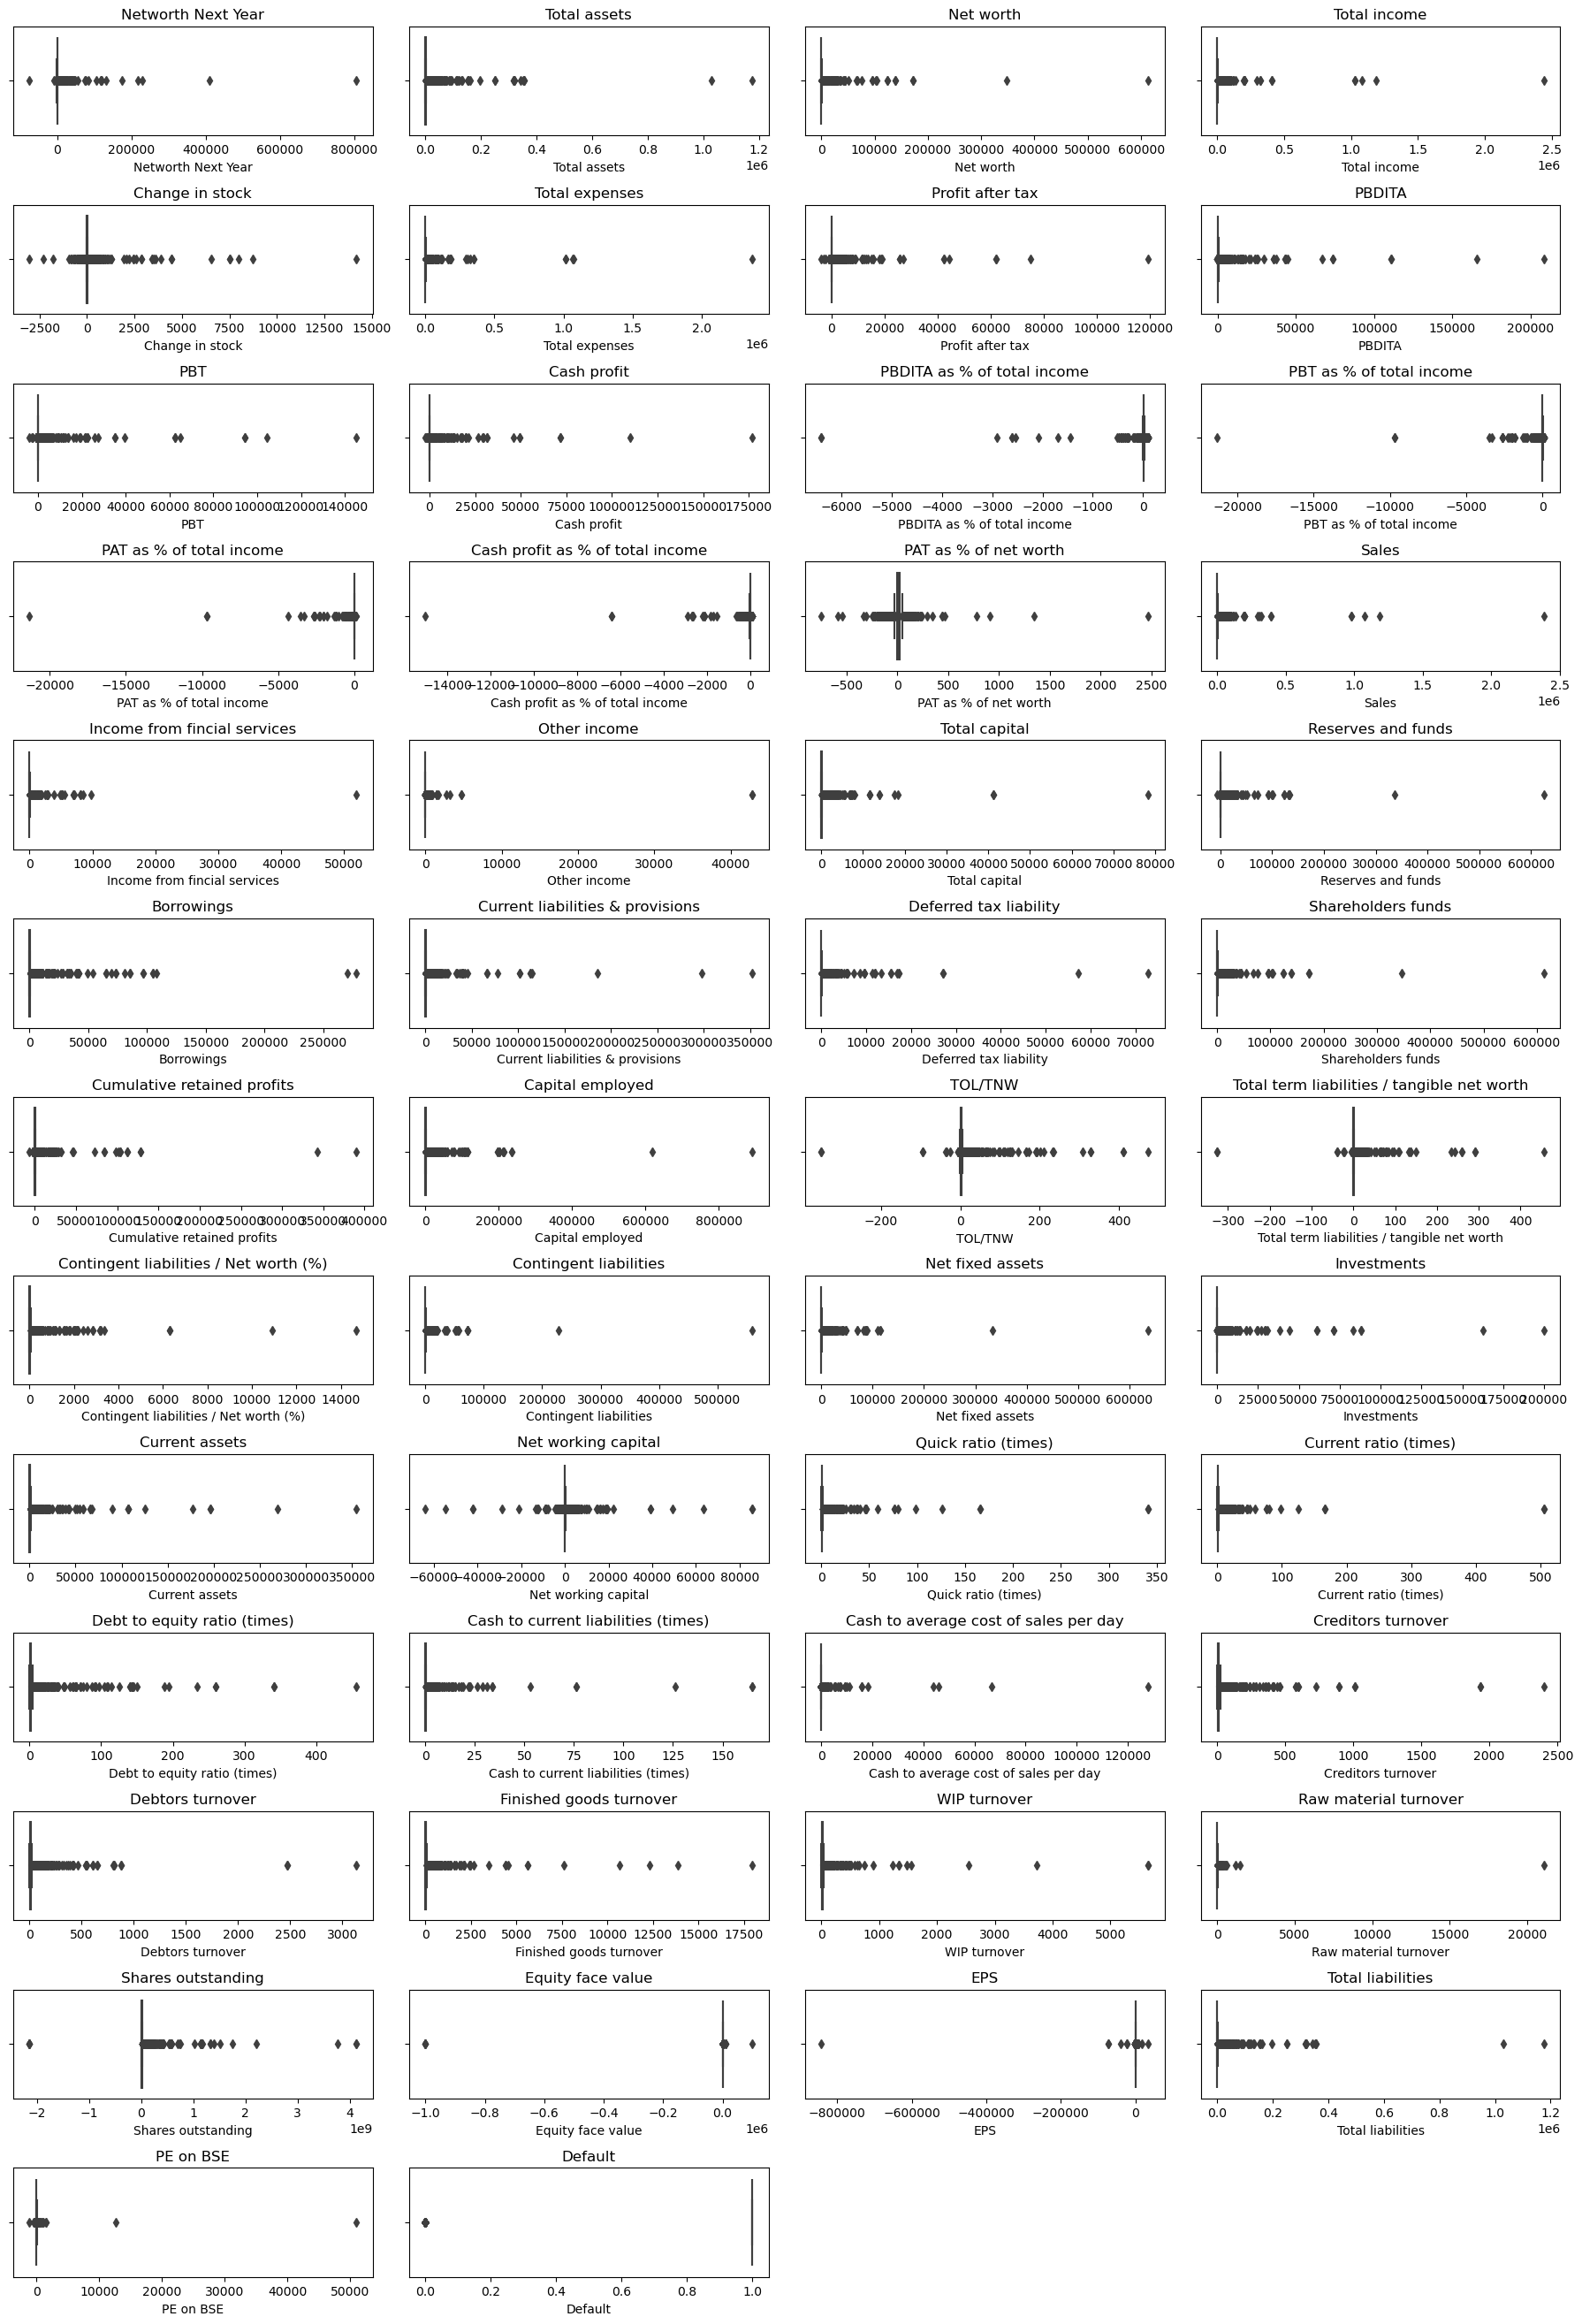

In [38]:
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(15, 4, i + 1)
    sns.boxplot(x=variable,data=df)  ## Complete the code to get boxplot of all variables with Default column in the data
    plt.tight_layout()
    plt.title(variable)


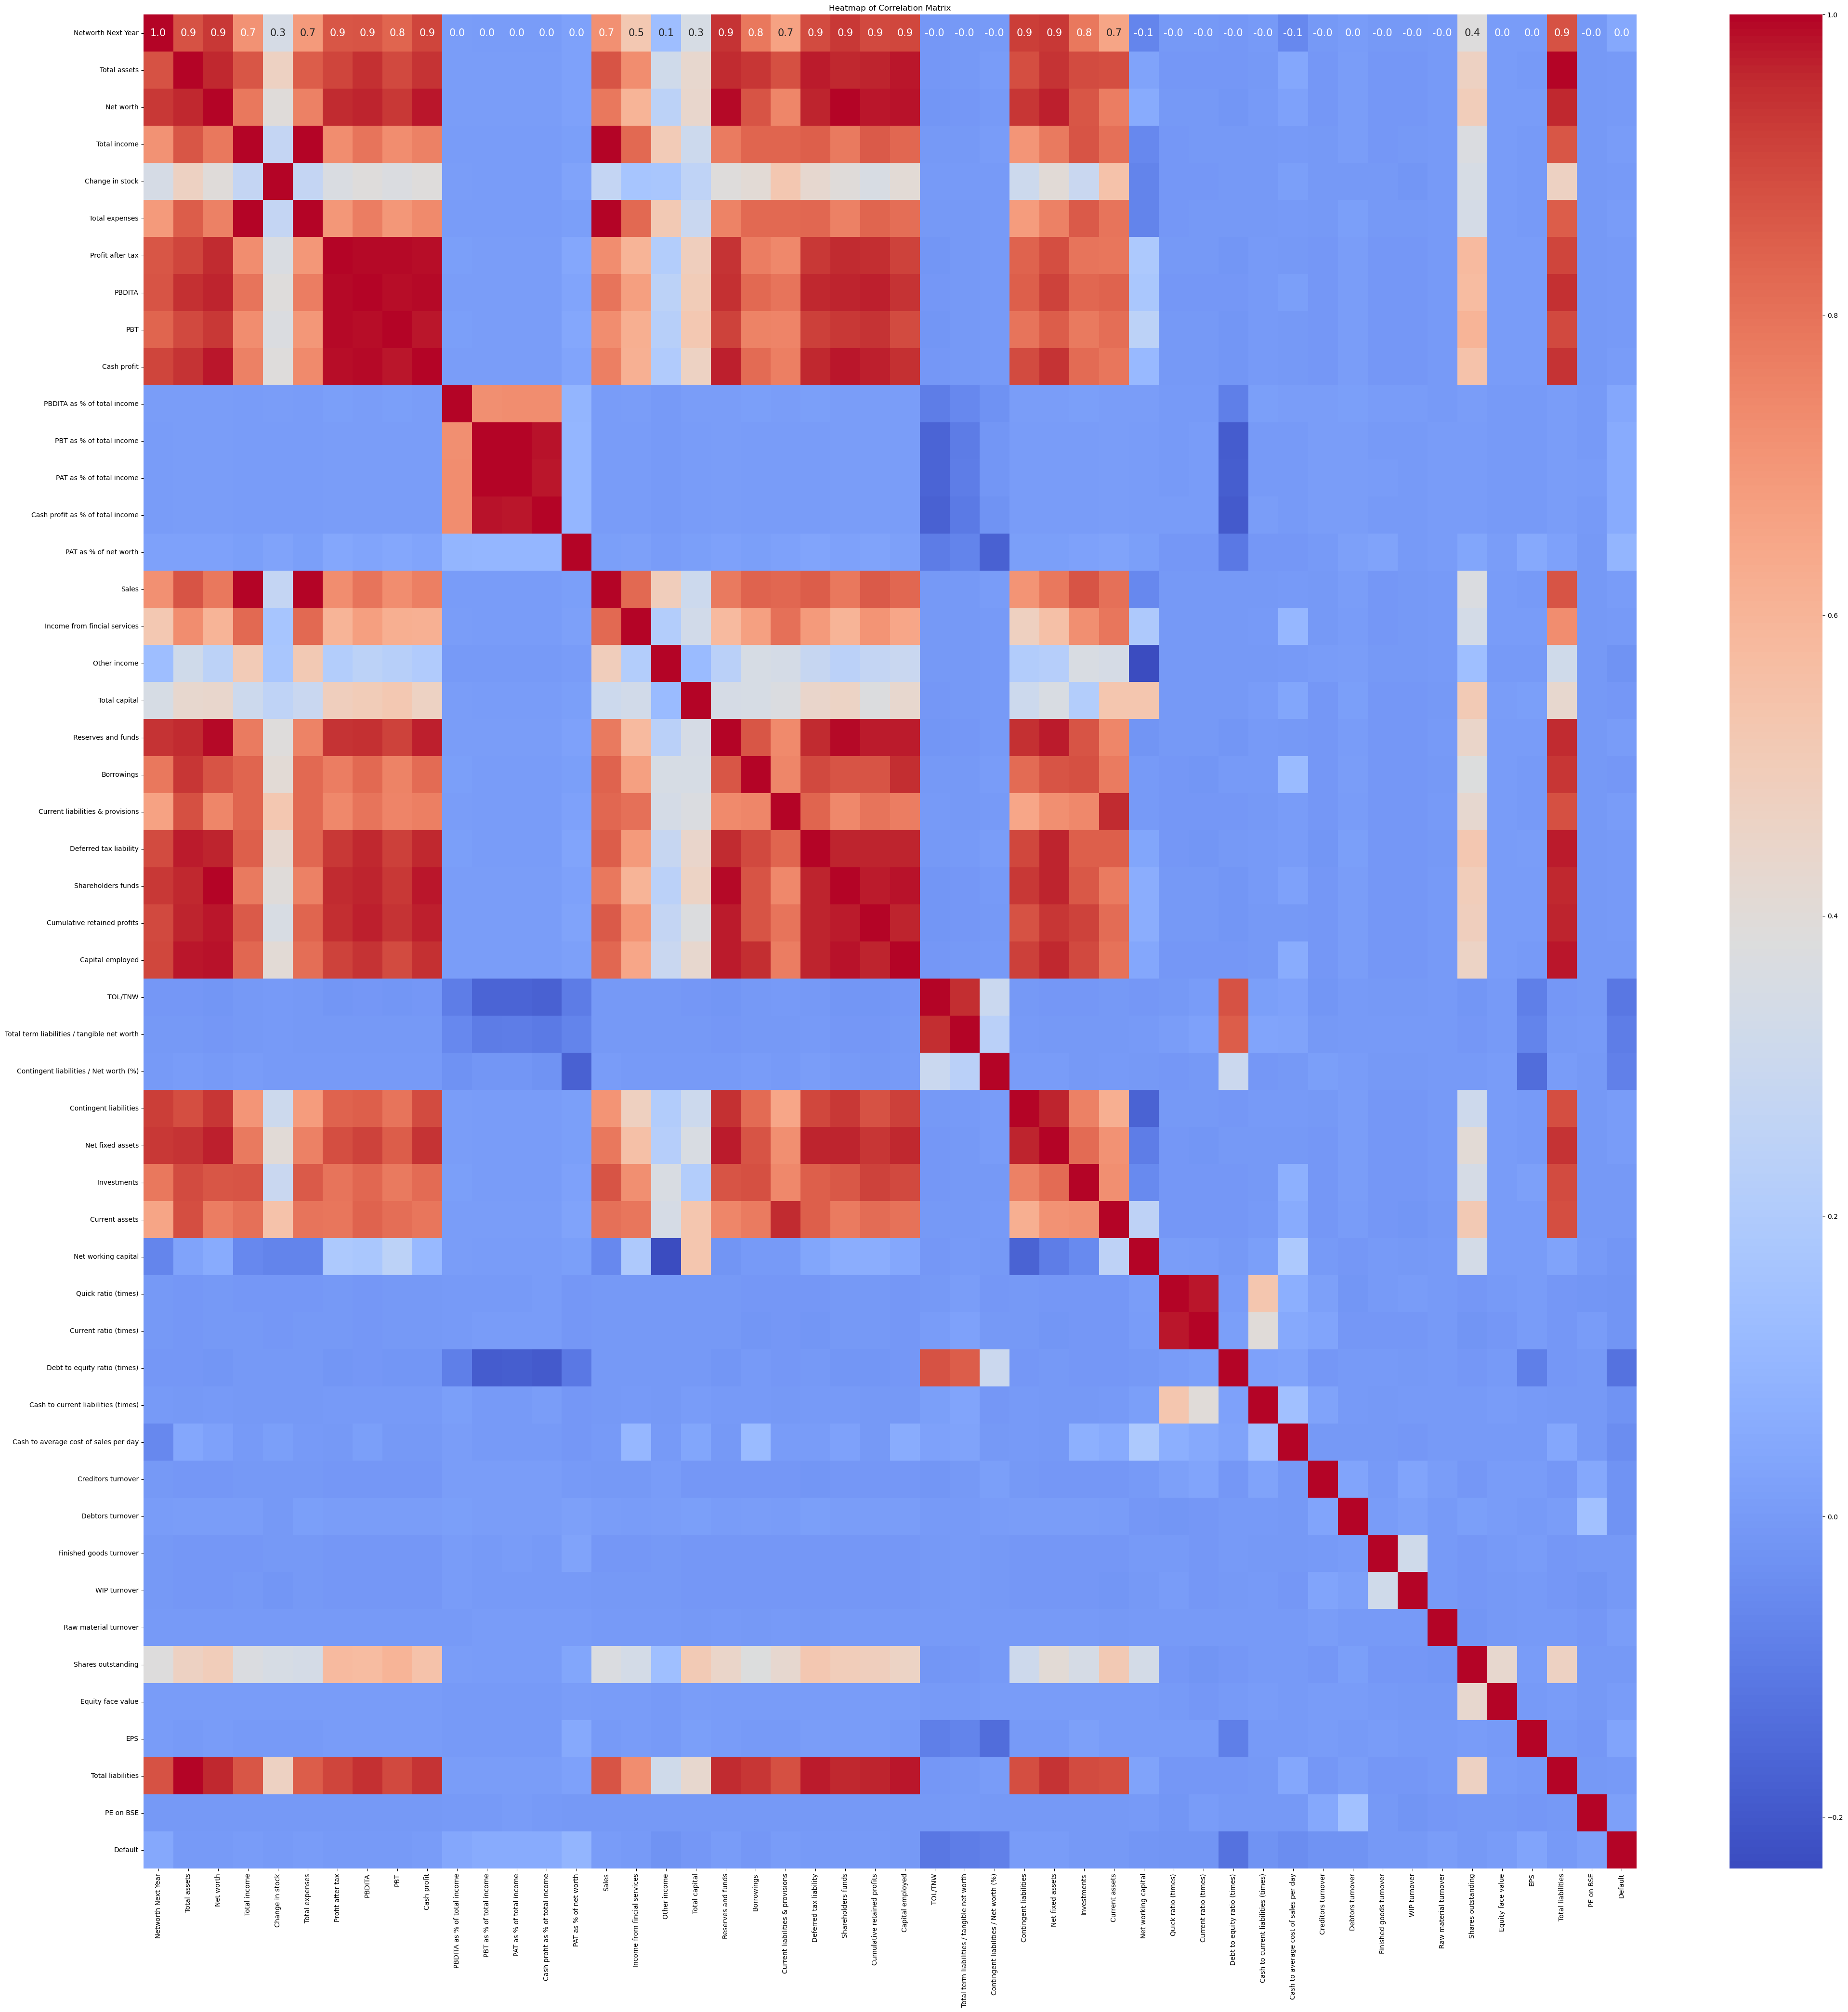

In [39]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)  ## Complete the code to get the correlation matrix for the data

# Create a heatmap of the correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 15})
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [108]:
corr_matrix

,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,Cash profit,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Total liabilities,PE on BSE,Default
Networth Next Year,1.000000,0.877803,0.930135,0.710953,0.345199,0.690526,0.867992,0.872395,0.833797,0.906610,...,0.005430,-0.006176,-0.006573,-0.001818,0.385854,0.004116,0.003431,0.877803,-0.003430,0.047567
Total assets,0.877803,1.000000,0.959404,0.868607,0.470735,0.852863,0.907560,0.943393,0.895117,0.939904,...,0.007887,-0.010292,-0.010790,-0.002903,0.474330,0.005216,0.001654,1.000000,-0.005067,-0.001661
Net worth,0.930135,0.959404,1.000000,0.783831,0.393760,0.761549,0.954399,0.962925,0.932463,0.978439,...,0.007610,-0.009197,-0.009574,-0.002498,0.494503,0.005377,0.003622,0.959404,-0.004323,0.000220
Total income,0.710953,0.868607,0.783831,1.000000,0.276395,0.999203,0.727438,0.793210,0.727190,0.762634,...,0.011494,-0.007918,-0.007481,-0.001259,0.369170,0.003178,0.001539,0.868607,-0.004044,0.002467
Change in stock,0.345199,0.470735,0.393760,0.276395,1.000000,0.273717,0.366994,0.389530,0.369046,0.391782,...,-0.003189,-0.006912,-0.016666,-0.001335,0.351013,0.006547,-0.002635,0.470735,-0.003053,-0.001959
Total expenses,0.690526,0.852863,0.761549,0.999203,0.273717,1.000000,0.699991,0.769182,0.700041,0.737395,...,0.011745,-0.007705,-0.007221,-0.001084,0.343341,0.003479,0.001411,0.852863,-0.003688,0.002852
Profit after tax,0.867992,0.907560,0.954399,0.727438,0.366994,0.699991,1.000000,0.990417,0.995142,0.990290,...,0.008058,-0.009191,-0.009841,-0.002624,0.578448,0.004040,0.003558,0.907560,-0.004433,0.000390
PBDITA,0.872395,0.943393,0.962925,0.793210,0.389530,0.769182,0.990417,1.000000,0.988875,0.991634,...,0.009173,-0.009781,-0.009929,-0.002814,0.571384,0.004489,0.002872,0.943393,-0.004650,-0.000834
PBT,0.833797,0.895117,0.932463,0.727190,0.369046,0.700041,0.995142,0.988875,1.000000,0.977955,...,0.008490,-0.009342,-0.009857,-0.002675,0.604438,0.004138,0.003338,0.895117,-0.004502,-0.001253
Cash profit,0.906610,0.939904,0.978439,0.762634,0.391782,0.737395,0.990290,0.991634,0.977955,1.000000,...,0.008489,-0.009195,-0.009369,-0.002563,0.542068,0.004145,0.002812,0.939904,-0.004310,0.002926


# Data Preprocessing

## Dropping columns with few unique values

In [40]:
df.nunique()

Networth Next Year                             2574
Total assets                                   2961
Net worth                                      2376
Total income                                   2870
Change in stock                                1164
Total expenses                                 2898
Profit after tax                               1467
PBDITA                                         1826
PBT                                            1568
Cash profit                                    1655
PBDITA as % of total income                    2032
PBT as % of total income                       1878
PAT as % of total income                       1692
Cash profit as % of total income               1867
PAT as % of net worth                          2385
Sales                                          2847
Income from fincial services                    561
Other income                                    406
Total capital                                  1525
Reserves and

We can drop the columns `Equity face value` and `Cash to current liabilities (times)` as they have very few unique values.

In [41]:
df.drop(['Equity face value', 'Cash to current liabilities (times)'], axis = 1, inplace = True)  ## Complete the code to drop the mentioned columns from the dataset
df.nunique()

Networth Next Year                             2574
Total assets                                   2961
Net worth                                      2376
Total income                                   2870
Change in stock                                1164
Total expenses                                 2898
Profit after tax                               1467
PBDITA                                         1826
PBT                                            1568
Cash profit                                    1655
PBDITA as % of total income                    2032
PBT as % of total income                       1878
PAT as % of total income                       1692
Cash profit as % of total income               1867
PAT as % of net worth                          2385
Sales                                          2847
Income from fincial services                    561
Other income                                    406
Total capital                                  1525
Reserves and

## Outliers Check

In [42]:
outliers_count = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR  ## Fill the blank with correct value for getting lower_bound
    upper_bound = Q3 + 1.5 * IQR  ## Fill the blank with correct value for getting upper_bound

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

print("Number of outliers in each column:")
pd.DataFrame([{'Column': column, 'No. of outliers': outliers} for column, outliers in outliers_count.items()])

Number of outliers in each column:


,Column,No. of outliers
0,Networth Next Year,624
1,Total assets,585
2,Net worth,595
3,Total income,508
4,Change in stock,750
5,Total expenses,518
6,Profit after tax,712
7,PBDITA,584
8,PBT,704
9,Cash profit,627


## Data Preparation for Modeling

In [43]:
# Seperating target variable from the rest of the data
df_X = df.drop(['Default'], axis = 1)
df_y = df['Default']

In [44]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42, stratify = df_y)  ## Complete the code to split the data into train and test in the ratio 75:25

## Missing Values Detection and Treatment

In [45]:
# Check missing values
X_train.isnull().sum()  ## Complete the code to get the number of null or NaN values in each column

Networth Next Year                                0
Total assets                                      0
Net worth                                         0
Total income                                    177
Change in stock                                 424
Total expenses                                  125
Profit after tax                                114
PBDITA                                          114
PBT                                             114
Cash profit                                     114
PBDITA as % of total income                      65
PBT as % of total income                         65
PAT as % of total income                         65
Cash profit as % of total income                 65
PAT as % of net worth                             0
Sales                                           237
Income from fincial services                    848
Other income                                   1180
Total capital                                     5
Reserves and

In [46]:
# Check missing values
X_test.isna().sum()

Networth Next Year                               0
Total assets                                     0
Net worth                                        0
Total income                                    54
Change in stock                                126
Total expenses                                  40
Profit after tax                                40
PBDITA                                          40
PBT                                             40
Cash profit                                     40
PBDITA as % of total income                     14
PBT as % of total income                        14
PAT as % of total income                        14
Cash profit as % of total income                14
PAT as % of net worth                            0
Sales                                           68
Income from fincial services                   263
Other income                                   376
Total capital                                    0
Reserves and funds             

In [47]:
#Replace the missing values in the data using KNN Imputer
KNNimputerModel = KNNImputer(n_neighbors = 5)  ## Complete the code to select 5 neighbors for KNN Imputer

X_train = pd.DataFrame(KNNimputerModel.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(KNNimputerModel.fit_transform(X_test), columns = X_test.columns)  ## Complete the code to replace missing values in X_test

In [48]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


## Scaling the Data

In [49]:
#Scaling of features is done to bring all the features to the same scale.
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test), columns=X_test.columns)  ## Complete the code to scale X_test to the same scale as X_train

In [50]:
X_train_scaled.head()

,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,Cash profit,...,Cash to average cost of sales per day,Creditors turnover,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,EPS,Total liabilities,PE on BSE
0,-0.069510,-0.093515,-0.090218,-0.063618,-0.082629,-0.062063,-0.080287,-0.085284,-0.080341,-0.080944,...,-0.059548,-0.165366,-0.135381,-0.128796,-0.157115,-0.027863,-0.112738,0.017437,-0.093515,-0.851318
1,-0.071415,-0.094434,-0.094256,-0.066741,-0.134937,-0.065198,-0.087894,-0.092591,-0.089593,-0.088819,...,-0.053807,-0.070216,-0.142884,-0.146487,-0.165150,-0.029802,-0.112025,0.016848,-0.094434,-0.851402
2,-0.057220,-0.088881,-0.076723,-0.074186,-0.061308,-0.073015,-0.078668,-0.080500,-0.077617,-0.071464,...,-0.058170,-0.063630,-0.129546,-0.146793,-0.169722,-0.029970,-0.077805,0.016956,-0.088881,1.145712
3,-0.075341,-0.081726,-0.096148,-0.071645,-0.105088,-0.070028,-0.089451,-0.086834,-0.088940,-0.079249,...,-0.051081,-0.158920,-0.031178,-0.076162,0.082968,-0.045005,-0.106084,0.016725,-0.081726,1.146146
4,-0.048810,-0.091118,-0.078278,-0.080874,-0.099118,-0.079398,-0.092812,-0.099024,-0.093397,-0.091362,...,-0.043486,-0.195494,-0.166017,-0.135241,-0.129477,-0.049291,-0.036678,0.016661,-0.091118,1.626328


In [51]:
X_test_scaled.head()

,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,Cash profit,...,Cash to average cost of sales per day,Creditors turnover,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,EPS,Total liabilities,PE on BSE
0,-0.061243,-0.102046,-0.062729,-0.128983,0.057022,-0.121655,-0.094727,-0.087066,-0.091867,-0.071213,...,-0.001312,-0.135427,-0.095051,-0.155083,-0.139530,-0.395188,-0.099742,0.024322,-0.102046,-0.235560
1,-0.157165,-0.164107,-0.168239,-0.198181,-0.086584,-0.198137,-0.120886,-0.140266,-0.117507,-0.134049,...,-0.127513,-0.098252,-0.189336,-0.098467,-0.122520,1.939744,-0.074977,0.015168,-0.164107,1.507136
2,-0.134541,-0.155785,-0.150662,-0.168587,-0.078622,-0.168203,-0.105904,-0.124323,-0.101013,-0.120684,...,-0.130336,-0.151305,-0.169148,-0.010361,-0.116255,0.033344,-0.075071,0.018001,-0.155785,0.232957
3,-0.033366,-0.113262,-0.136738,-0.140262,0.024954,-0.133203,-0.106903,-0.117828,-0.099445,-0.111102,...,-0.105261,-0.097218,-0.145823,-0.078031,-0.042809,0.626194,-0.094305,0.018693,-0.113262,-0.094247
4,-0.131936,-0.151541,-0.157266,-0.180014,-0.075305,-0.179378,-0.112277,-0.129075,-0.108982,-0.122822,...,-0.123014,-0.120557,-0.179027,0.019070,-0.044201,-0.009226,-0.080968,0.016518,-0.151541,-0.150668


# Model Building

## Model Evaluation Criterion

*Metric of Choice*
-


In [52]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)  # to compute Accuracy
    recall = recall_score(target, y_pred)  # to compute Recall
    precision = precision_score(target, y_pred)  # to compute Precision
    f1 = f1_score(target, y_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [53]:
def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression

In [54]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [55]:
X_train_with_intercept.head()

,const,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Cash to average cost of sales per day,Creditors turnover,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,EPS,Total liabilities,PE on BSE
0,1.0,-0.069510,-0.093515,-0.090218,-0.063618,-0.082629,-0.062063,-0.080287,-0.085284,-0.080341,...,-0.059548,-0.165366,-0.135381,-0.128796,-0.157115,-0.027863,-0.112738,0.017437,-0.093515,-0.851318
1,1.0,-0.071415,-0.094434,-0.094256,-0.066741,-0.134937,-0.065198,-0.087894,-0.092591,-0.089593,...,-0.053807,-0.070216,-0.142884,-0.146487,-0.165150,-0.029802,-0.112025,0.016848,-0.094434,-0.851402
2,1.0,-0.057220,-0.088881,-0.076723,-0.074186,-0.061308,-0.073015,-0.078668,-0.080500,-0.077617,...,-0.058170,-0.063630,-0.129546,-0.146793,-0.169722,-0.029970,-0.077805,0.016956,-0.088881,1.145712
3,1.0,-0.075341,-0.081726,-0.096148,-0.071645,-0.105088,-0.070028,-0.089451,-0.086834,-0.088940,...,-0.051081,-0.158920,-0.031178,-0.076162,0.082968,-0.045005,-0.106084,0.016725,-0.081726,1.146146
4,1.0,-0.048810,-0.091118,-0.078278,-0.080874,-0.099118,-0.079398,-0.092812,-0.099024,-0.093397,...,-0.043486,-0.195494,-0.166017,-0.135241,-0.129477,-0.049291,-0.036678,0.016661,-0.091118,1.626328


In [56]:
y_train.reset_index(inplace = True, drop = True)

In [57]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit(method='bfgs', maxiter=3192)   ## Complete the code to define Logistic Regression Model
print(LogisticReg.summary())

Optimization terminated successfully.
         Current function value: 0.034979
         Iterations: 749
         Function evaluations: 850
         Gradient evaluations: 850
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 3192
Model:                          Logit   Df Residuals:                     3145
Method:                           MLE   Df Model:                           46
Date:                Sat, 27 Jul 2024   Pseudo R-squ.:                  0.9324
Time:                        20:00:24   Log-Likelihood:                -111.65
converged:                       True   LL-Null:                       -1650.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

### Logistic Regression Model - Training Performance

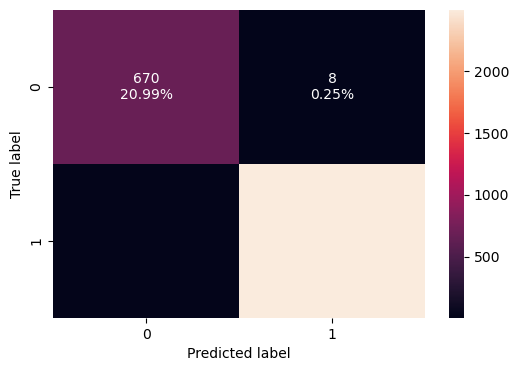

In [58]:
model_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

In [59]:
logistic_regression_perf_train = model_performance_classification(LogisticReg, X_train_with_intercept, y_train)
logistic_regression_perf_train

,Accuracy,Recall,Precision,F1
0,0.990602,0.991249,0.9968,0.994017


In [62]:
def model_confusion_matrix1(model, X, y, threshold=0.5):
    # Predict probabilities
    y_pred_proba = model.predict(X)
    
    # Convert probabilities to binary outcomes using the specified threshold
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y, y_pred)
    
    return conf_matrix


# Get and print the confusion matrix
conf_matrix = model_confusion_matrix1(LogisticReg, X_train_with_intercept, y_train)
print("Confusion Matrix:")
print(conf_matrix)

# Extract values
tn, fp, fn, tp = conf_matrix.ravel()


#ac = (tp + tn) / (tp + tn + fp + fn)
pr = tp / (tp + fp)
re = tp / (tp + fn)
sp = tn / (tn + fp)
f1 = 2 * (pr * re) / (pr + re)

# Total number of samples
total_samples = tn + fp + fn + tp

# Compute percentages for each cell in the confusion matrix
percentages = conf_matrix / total_samples * 100

print(f"True Negatives (TN): {tn} ({percentages[0, 0]:.2f}%)")
print(f"False Positives (FP): {fp} ({percentages[0, 1]:.2f}%)")
print(f"False Negatives (FN): {fn} ({percentages[1, 0]:.2f}%)")
print(f"True Positives (TP): {tp} ({percentages[1, 1]:.2f}%)")

Confusion Matrix:
[[ 670    8]
 [  22 2492]]
True Negatives (TN): 670 (20.99%)
False Positives (FP): 8 (0.25%)
False Negatives (FN): 22 (0.69%)
True Positives (TP): 2492 (78.07%)


### Logistic Regression Model - Test Performance

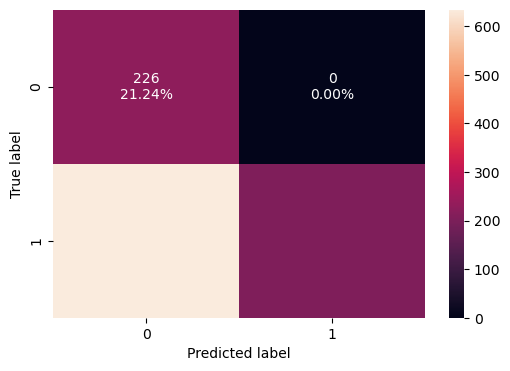

In [63]:
model_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)  ## Complete the code to create confusion matrix for test data

In [65]:
def model_confusion_matrix1(model, X, y, threshold=0.5):
    # Predict probabilities
    y_pred_proba = model.predict(X)
    
    # Convert probabilities to binary outcomes using the specified threshold
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y, y_pred)
    
    return conf_matrix


# Get and print the confusion matrix
conf_matrix = model_confusion_matrix1(LogisticReg, X_test_with_intercept, y_test)
print("Confusion Matrix:")
print(conf_matrix)

# Extract values
tn, fp, fn, tp = conf_matrix.ravel()


#ac = (tp + tn) / (tp + tn + fp + fn)
pr = tp / (tp + fp)
re = tp / (tp + fn)
sp = tn / (tn + fp)
f1 = 2 * (pr * re) / (pr + re)

# Total number of samples
total_samples = tn + fp + fn + tp

# Compute percentages for each cell in the confusion matrix
percentages = conf_matrix / total_samples * 100

print(f"True Negatives (TN): {tn} ({percentages[0, 0]:.2f}%)")
print(f"False Positives (FP): {fp} ({percentages[0, 1]:.2f}%)")
print(f"False Negatives (FN): {fn} ({percentages[1, 0]:.2f}%)")
print(f"True Positives (TP): {tp} ({percentages[1, 1]:.2f}%)")

Confusion Matrix:
[[226   0]
 [634 204]]
True Negatives (TN): 226 (21.24%)
False Positives (FP): 0 (0.00%)
False Negatives (FN): 634 (59.59%)
True Positives (TP): 204 (19.17%)


In [66]:
logistic_regression_perf_test = model_performance_classification(LogisticReg, X_test_with_intercept, y_test)  ## Complete the code to check performance on test data
logistic_regression_perf_test

,Accuracy,Recall,Precision,F1
0,0.404135,0.243437,1.0,0.391555


## Random Forest

In [67]:
rf_classifier = RandomForestClassifier(random_state=42)  ## Complete the code to define random forest with random state = 42
rf_model = rf_classifier.fit(X_train,y_train) ## Complete the code to fit random forest on the train data

### Random Forest Model - Training Performance

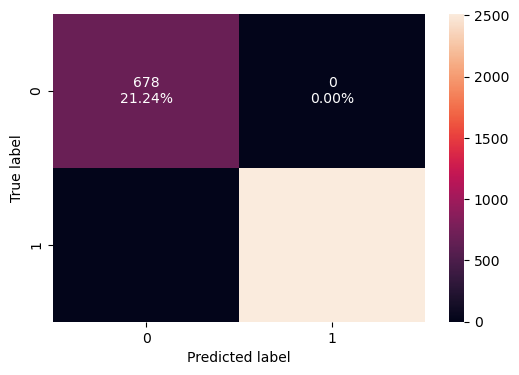

In [68]:
model_confusion_matrix(rf_model, X_train, y_train)

In [70]:
# Assuming LogisticReg_improved is your model fitted using statsmodels
# y_train are the true labels and X_train_new_with_intercept is the feature set with intercept added

# Get the predicted probabilities
y_pred_proba = rf_model.predict(X_train)

# Apply the optimal threshold to get binary predictions
optimal_threshold_logit = 0.5
y_pred = (y_pred_proba >= optimal_threshold_logit).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Extract values
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Compute additional metrics
ac = (tp + tn) / (tp + tn + fp + fn)
pr = tp / (tp + fp)
re = tp / (tp + fn)
sp = tn / (tn + fp)
f1 = 2 * (pr * re) / (pr + re)

# Total number of samples
total_samples = tn + fp + fn + tp

# Compute percentages for each cell in the confusion matrix
percentages = conf_matrix / total_samples * 100

print(f"True Negatives (TN): {tn} ({percentages[0, 0]:.2f}%)")
print(f"False Positives (FP): {fp} ({percentages[0, 1]:.2f}%)")
print(f"False Negatives (FN): {fn} ({percentages[1, 0]:.2f}%)")
print(f"True Positives (TP): {tp} ({percentages[1, 1]:.2f}%)")

Confusion Matrix:
[[ 678    0]
 [   0 2514]]
True Negatives (TN): 678
False Positives (FP): 0
False Negatives (FN): 0
True Positives (TP): 2514
True Negatives (TN): 678 (21.24%)
False Positives (FP): 0 (0.00%)
False Negatives (FN): 0 (0.00%)
True Positives (TP): 2514 (78.76%)


In [71]:
random_forest_perf_train = model_performance_classification(rf_model, X_train, y_train)
random_forest_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Random Forest Model - Test Performance

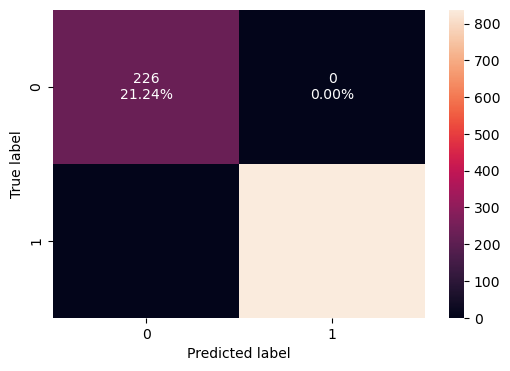

In [72]:
model_confusion_matrix(rf_model, X_test, y_test)  ## Complete the code to create confusion matrix for test data

In [73]:

# Get the predicted probabilities
y_pred_proba = rf_model.predict(X_test)

# Apply the optimal threshold to get binary predictions
optimal_threshold_logit = 0.5
y_pred = (y_pred_proba >= optimal_threshold_logit).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Compute additional metrics
ac = (tp + tn) / (tp + tn + fp + fn)
pr = tp / (tp + fp)
re = tp / (tp + fn)
sp = tn / (tn + fp)
f1 = 2 * (pr * re) / (pr + re)


# Total number of samples
total_samples = tn + fp + fn + tp

# Compute percentages for each cell in the confusion matrix
percentages = conf_matrix / total_samples * 100

print(f"True Negatives (TN): {tn} ({percentages[0, 0]:.2f}%)")
print(f"False Positives (FP): {fp} ({percentages[0, 1]:.2f}%)")
print(f"False Negatives (FN): {fn} ({percentages[1, 0]:.2f}%)")
print(f"True Positives (TP): {tp} ({percentages[1, 1]:.2f}%)")

Confusion Matrix:
[[226   0]
 [  0 838]]
True Negatives (TN): 226
False Positives (FP): 0
False Negatives (FN): 0
True Positives (TP): 838
True Negatives (TN): 226 (21.24%)
False Positives (FP): 0 (0.00%)
False Negatives (FN): 0 (0.00%)
True Positives (TP): 838 (78.76%)


In [74]:
random_forest_perf_test = model_performance_classification(rf_model, X_test, y_test)  ## Complete the code to check performance on test data
random_forest_perf_test

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


# Model Performance Improvement

## Model Performance Improvement - Logistic Regression

In [75]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [76]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train_scaled)  ## Complete the code to calculate VIF for the scaled X_train data

print("Variance Inflation Factors:")
vif_result

Variance Inflation Factors:


,Variable,VIF
0,Networth Next Year,1.618748e+01
1,Total assets,inf
2,Net worth,1.071191e+04
3,Total income,8.806383e+05
4,Change in stock,1.838297e+01
5,Total expenses,4.070758e+05
6,Profit after tax,3.859488e+03
7,PBDITA,1.757314e+03
8,PBT,2.555340e+03
9,Cash profit,1.744306e+03


In [77]:
high_vif_columns = []
for i, row in vif_result.iterrows():
    if row['VIF'] >= 5:
        high_vif_columns.append(row['Variable'])
high_vif_columns

['Networth Next Year',
 'Total assets',
 'Net worth',
 'Total income',
 'Change in stock',
 'Total expenses',
 'Profit after tax',
 'PBDITA',
 'PBT',
 'Cash profit',
 'PBDITA as % of total income',
 'PBT as % of total income',
 'PAT as % of total income',
 'Cash profit as % of total income',
 'Sales',
 'Income from fincial services',
 'Other income',
 'Total capital',
 'Reserves and funds',
 'Borrowings',
 'Current liabilities & provisions',
 'Deferred tax liability',
 'Shareholders funds',
 'Cumulative retained profits',
 'Capital employed',
 'TOL/TNW',
 'Total term liabilities / tangible net worth',
 'Contingent liabilities',
 'Net fixed assets',
 'Investments',
 'Current assets',
 'Net working capital',
 'Quick ratio (times)',
 'Current ratio (times)',
 'Debt to equity ratio (times)',
 'Total liabilities']

In [78]:
# Dropping columns with VIF > 5
X_train_scaled.drop(columns = high_vif_columns, axis=1, inplace=True)
X_test_scaled.drop(columns = high_vif_columns, axis=1, inplace=True)

In [79]:
X_train_scaled.shape

(3192, 11)

In [80]:
X_test_scaled.shape

(1064, 11)

In [81]:
X_train_new_with_intercept = SM.add_constant(X_train_scaled)
X_test_new_with_intercept = SM.add_constant(X_test_scaled)

In [82]:
# Retraining Logistic Regression Model with new data
LogisticReg_improved = SM.Logit(y_train, X_train_new_with_intercept).fit(method='bfgs', maxiter=100)  # Fit Logistic Regression Model on new train data with intercept
print(LogisticReg_improved.summary())

Optimization terminated successfully.
         Current function value: 0.505812
         Iterations: 42
         Function evaluations: 43
         Gradient evaluations: 43
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 3192
Model:                          Logit   Df Residuals:                     3180
Method:                           MLE   Df Model:                           11
Date:                Sat, 27 Jul 2024   Pseudo R-squ.:                 0.02188
Time:                        20:05:09   Log-Likelihood:                -1614.6
converged:                       True   LL-Null:                       -1650.7
Covariance Type:            nonrobust   LLR p-value:                 4.578e-11
                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [83]:
# Finding Optimal Threshold value
logit_y_pred = LogisticReg_improved.predict(X_train_new_with_intercept)
fpr, tpr, thresholds = roc_curve(y_train, logit_y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
optimal_threshold_logit

0.779

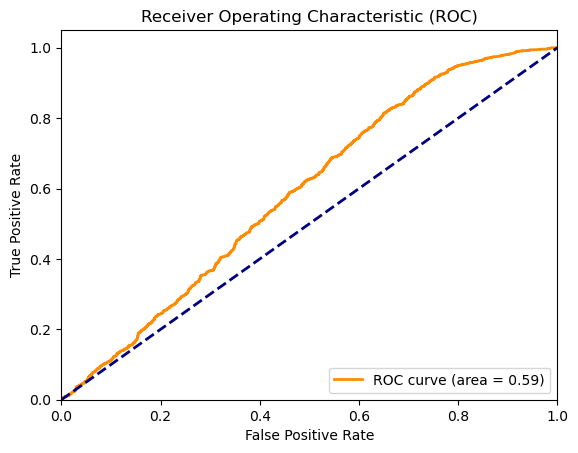

In [84]:
roc_auc = roc_auc_score(y_train, logit_y_pred)  ## Complete the code to get roc_auc score
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression Performance - Training Set

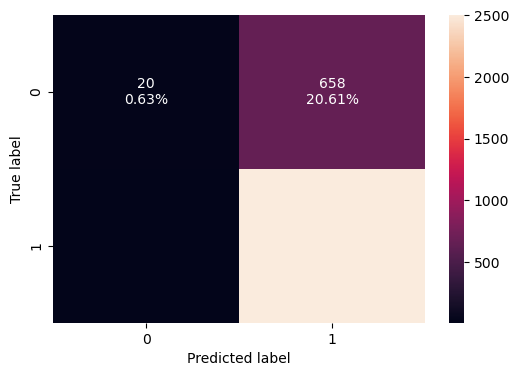

In [87]:
model_confusion_matrix(LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit)

In [85]:

# Get the predicted probabilities
y_pred_proba = LogisticReg_improved.predict(X_train_new_with_intercept)

# Apply the optimal threshold to get binary predictions
optimal_threshold_logit = 0.5
y_pred = (y_pred_proba >= optimal_threshold_logit).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Extract values
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Compute additional metrics
ac = (tp + tn) / (tp + tn + fp + fn)
pr = tp / (tp + fp)
re = tp / (tp + fn)
sp = tn / (tn + fp)
f1 = 2 * (pr * re) / (pr + re)


# Total number of samples
total_samples = tn + fp + fn + tp

# Compute percentages for each cell in the confusion matrix
percentages = conf_matrix / total_samples * 100

print(f"True Negatives (TN): {tn} ({percentages[0, 0]:.2f}%)")
print(f"False Positives (FP): {fp} ({percentages[0, 1]:.2f}%)")
print(f"False Negatives (FN): {fn} ({percentages[1, 0]:.2f}%)")
print(f"True Positives (TP): {tp} ({percentages[1, 1]:.2f}%)")

Confusion Matrix:
[[  20  658]
 [  10 2504]]
True Negatives (TN): 20
False Positives (FP): 658
False Negatives (FN): 10
True Positives (TP): 2504
True Negatives (TN): 20 (0.63%)
False Positives (FP): 658 (20.61%)
False Negatives (FN): 10 (0.31%)
True Positives (TP): 2504 (78.45%)


In [86]:
logistic_regression_tuned_perf_train = model_performance_classification(
    LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit
)
logistic_regression_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.790727,0.996022,0.791904,0.882311


### Logistic Regression Performance - Test Set

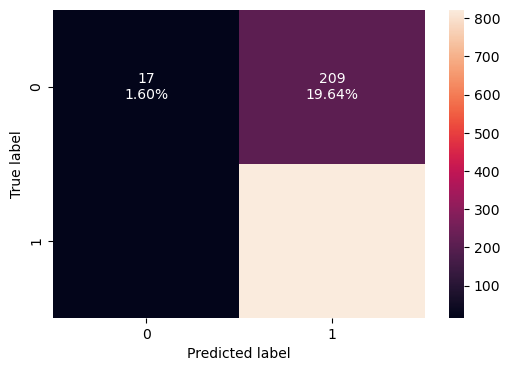

In [88]:
model_confusion_matrix(LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit)  ## Complete the code to create confusion matrix for test data

In [89]:

# Get the predicted probabilities
y_pred_proba = LogisticReg_improved.predict(X_test_new_with_intercept)

# Apply the optimal threshold to get binary predictions
optimal_threshold_logit = 0.5
y_pred = (y_pred_proba >= optimal_threshold_logit).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Compute additional metrics
ac = (tp + tn) / (tp + tn + fp + fn)
pr = tp / (tp + fp)
re = tp / (tp + fn)
sp = tn / (tn + fp)
f1 = 2 * (pr * re) / (pr + re)


# Total number of samples
total_samples = tn + fp + fn + tp

# Compute percentages for each cell in the confusion matrix
percentages = conf_matrix / total_samples * 100

print(f"True Negatives (TN): {tn} ({percentages[0, 0]:.2f}%)")
print(f"False Positives (FP): {fp} ({percentages[0, 1]:.2f}%)")
print(f"False Negatives (FN): {fn} ({percentages[1, 0]:.2f}%)")
print(f"True Positives (TP): {tp} ({percentages[1, 1]:.2f}%)")

Confusion Matrix:
[[ 17 209]
 [ 16 822]]
True Negatives (TN): 17
False Positives (FP): 209
False Negatives (FN): 16
True Positives (TP): 822
True Negatives (TN): 17 (1.60%)
False Positives (FP): 209 (19.64%)
False Negatives (FN): 16 (1.50%)
True Positives (TP): 822 (77.26%)


In [90]:
logistic_regression_tuned_perf_test = model_performance_classification(
    LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit
    
)  ## Complete the code to check performance on test data
logistic_regression_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.788534,0.980907,0.797284,0.879615


## Model Performance Improvement - Random Forest

In [91]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 7, 9],    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 6, 7],  # Minimum number of samples required at each leaf node
}

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [92]:
# Access the best estimator directly if needed
best_rf_classifier = grid_search.best_estimator_

In [93]:
params_used = best_rf_classifier.get_params()

# Print the parameters
print("Parameters used in the Random Forest Classifier:")
for param_name, param_value in params_used.items():
    print(f"{param_name}: {param_value}")

Parameters used in the Random Forest Classifier:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: 7
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 5
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 200
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


### Random Forest Performance - Training Set

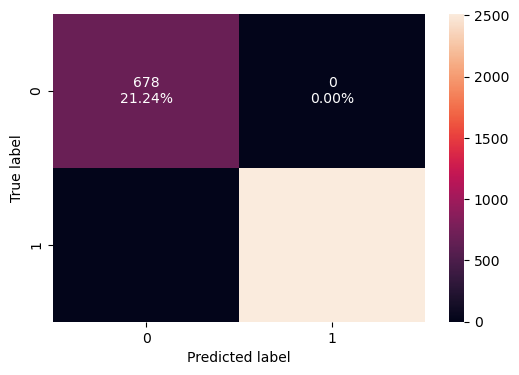

In [94]:
model_confusion_matrix(best_rf_classifier, X_train, y_train)  ## Complete the code to create confusion matrix for training data

In [95]:

# Get the predicted probabilities
y_pred_proba = best_rf_classifier.predict(X_train)

# Apply the optimal threshold to get binary predictions
optimal_threshold_logit = 0.5
y_pred = (y_pred_proba >= optimal_threshold_logit).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Extract values
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Compute additional metrics
ac = (tp + tn) / (tp + tn + fp + fn)
pr = tp / (tp + fp)
re = tp / (tp + fn)
sp = tn / (tn + fp)
f1 = 2 * (pr * re) / (pr + re)


# Total number of samples
total_samples = tn + fp + fn + tp

# Compute percentages for each cell in the confusion matrix
percentages = conf_matrix / total_samples * 100

print(f"True Negatives (TN): {tn} ({percentages[0, 0]:.2f}%)")
print(f"False Positives (FP): {fp} ({percentages[0, 1]:.2f}%)")
print(f"False Negatives (FN): {fn} ({percentages[1, 0]:.2f}%)")
print(f"True Positives (TP): {tp} ({percentages[1, 1]:.2f}%)")

Confusion Matrix:
[[ 678    0]
 [   0 2514]]
True Negatives (TN): 678
False Positives (FP): 0
False Negatives (FN): 0
True Positives (TP): 2514
True Negatives (TN): 678 (21.24%)
False Positives (FP): 0 (0.00%)
False Negatives (FN): 0 (0.00%)
True Positives (TP): 2514 (78.76%)


In [96]:
random_forest_tuned_perf_train = model_performance_classification(best_rf_classifier, X_train, y_train)  ## Complete the code to check performance on training data
random_forest_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Random Forest Performance - Test Set

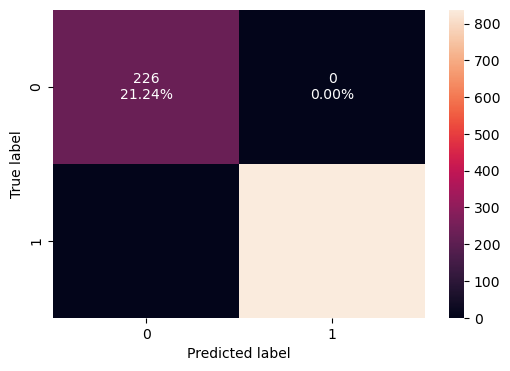

In [97]:
model_confusion_matrix(best_rf_classifier, X_test, y_test)  ## Complete the code to create confusion matrix for test data

In [98]:

# Get the predicted probabilities
y_pred_proba = best_rf_classifier.predict(X_test)

# Apply the optimal threshold to get binary predictions
optimal_threshold_logit = 0.5
y_pred = (y_pred_proba >= optimal_threshold_logit).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Compute additional metrics
ac = (tp + tn) / (tp + tn + fp + fn)
pr = tp / (tp + fp)
re = tp / (tp + fn)
sp = tn / (tn + fp)
f1 = 2 * (pr * re) / (pr + re)


# Total number of samples
total_samples = tn + fp + fn + tp

# Compute percentages for each cell in the confusion matrix
percentages = conf_matrix / total_samples * 100

print(f"True Negatives (TN): {tn} ({percentages[0, 0]:.2f}%)")
print(f"False Positives (FP): {fp} ({percentages[0, 1]:.2f}%)")
print(f"False Negatives (FN): {fn} ({percentages[1, 0]:.2f}%)")
print(f"True Positives (TP): {tp} ({percentages[1, 1]:.2f}%)")

Confusion Matrix:
[[226   0]
 [  0 838]]
True Negatives (TN): 226
False Positives (FP): 0
False Negatives (FN): 0
True Positives (TP): 838
True Negatives (TN): 226 (21.24%)
False Positives (FP): 0 (0.00%)
False Negatives (FN): 0 (0.00%)
True Positives (TP): 838 (78.76%)


In [99]:
random_forest_tuned_perf_test = model_performance_classification(best_rf_classifier, X_test, y_test)  ## Complete the code to check performance on test data
random_forest_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


# Model Comparison and Final Model Selection

In [100]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_regression_perf_train.T,
        logistic_regression_tuned_perf_train.T,
        random_forest_perf_train.T,
        random_forest_tuned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Tuned Logistic Regression,Random Forest,Tuned Random Forest
Accuracy,0.990602,0.790727,1.0,1.0
Recall,0.991249,0.996022,1.0,1.0
Precision,0.996800,0.791904,1.0,1.0
F1,0.994017,0.882311,1.0,1.0


In [101]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_regression_perf_test.T,
        logistic_regression_tuned_perf_test.T,
        random_forest_perf_test.T,
        random_forest_tuned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression,Tuned Logistic Regression,Random Forest,Tuned Random Forest
Accuracy,0.404135,0.788534,1.0,1.0
Recall,0.243437,0.980907,1.0,1.0
Precision,1.000000,0.797284,1.0,1.0
F1,0.391555,0.879615,1.0,1.0


In [109]:
feature_names = X_train.columns
importances = best_rf_classifier.feature_importances_


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature names and their importance values
print(importance_df)

                                        Feature  Importance
0                            Networth Next Year    0.701159
26                                      TOL/TNW    0.021158
9                                   Cash profit    0.018662
14                        PAT as % of net worth    0.017156
36                 Debt to equity ratio (times)    0.015290
13             Cash profit as % of total income    0.012409
24                  Cumulative retained profits    0.011428
11                     PBT as % of total income    0.010218
19                           Reserves and funds    0.009870
27  Total term liabilities / tangible net worth    0.008768
6                              Profit after tax    0.007633
23                           Shareholders funds    0.007561
8                                           PBT    0.007308
35                        Current ratio (times)    0.007292
2                                     Net worth    0.007227
44                                      

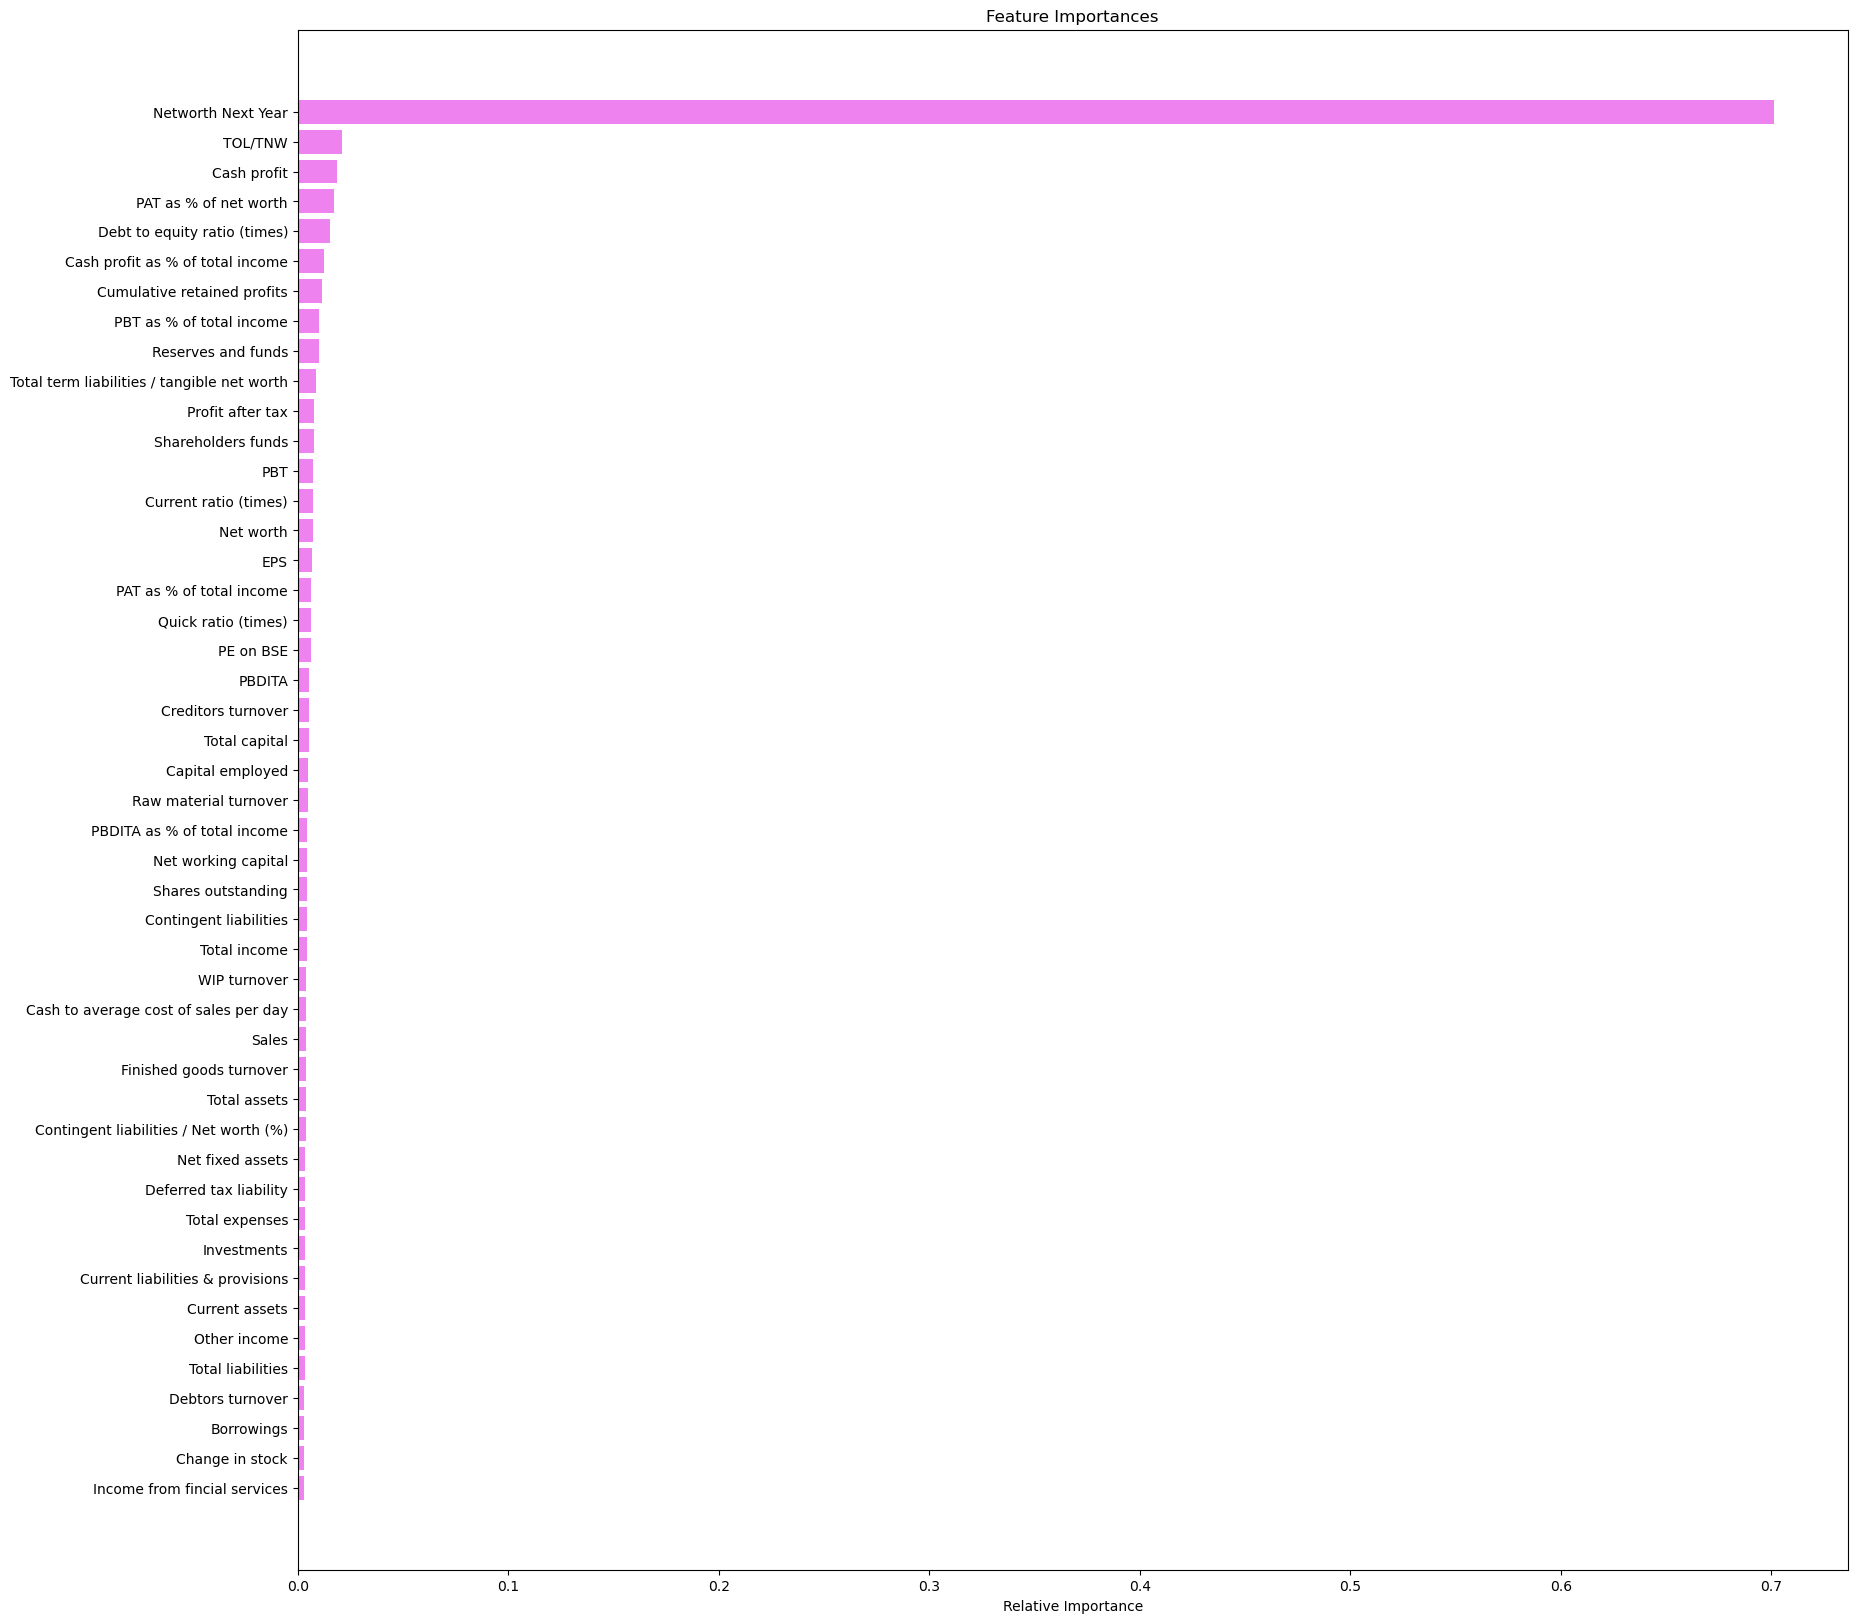

In [102]:
feature_names = X_train.columns
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Conclusions and Recommendations